11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 18s 2us/step


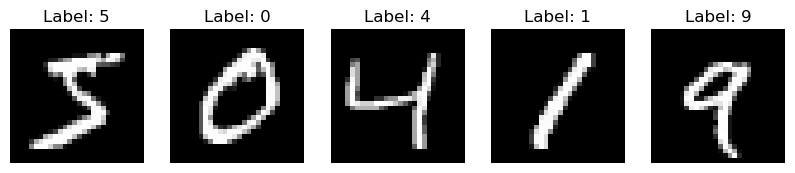

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.8902 - loss: 0.3653 - val_accuracy: 0.9854 - val_loss: 0.0435
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9851 - loss: 0.0509 - val_accuracy: 0.9864 - val_loss: 0.0398
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9891 - loss: 0.0355 - val_accuracy: 0.9870 - val_loss: 0.0377
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9921 - loss: 0.0248 - val_accuracy: 0.9896 - val_loss: 0.0334
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 34ms/step - accuracy: 0.9943 - loss: 0.0182 - val_accuracy: 0.9896 - val_loss: 0.0321
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9864 - loss: 0.0413
Test accuracy: 0.9896


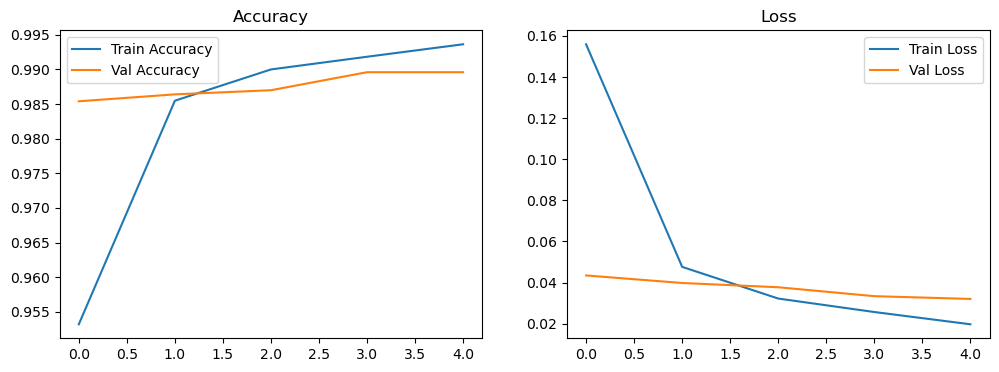

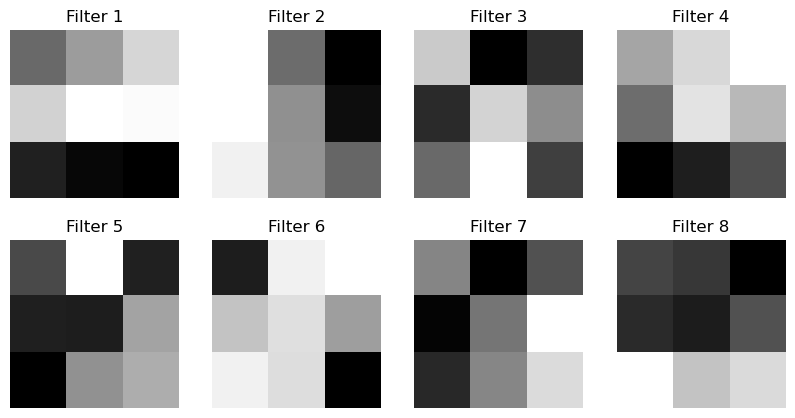

In [1]:
# Cell 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Cell 2: Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255  # Reshape for CNN, normalize
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encode labels
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Visualize sample images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {np.argmax(y_train[i])}')
    plt.axis('off')
plt.show()

# Cell 3: Build the CNN model
model = models.Sequential([
    # Convolution Layer 1: 32 filters, 3x3, ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),  # MaxPooling to reduce size
    
    # Convolution Layer 2: 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flattening: Convert 2D features to 1D
    layers.Flatten(),
    
    # Fully Connected Layers
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Cell 4: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Cell 5: Evaluate and plot results
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Cell 6: Visualize learned filters
filters, _ = model.layers[0].get_weights()  # Get weights of first Conv layer
plt.figure(figsize=(10, 5))
for i in range(8):  # Show 8 filters
    plt.subplot(2, 4, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
    plt.title(f'Filter {i+1}')
plt.show()

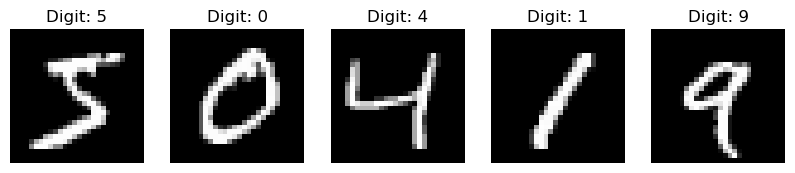

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,714 (221.54 KB)

 Trainable params: 56,714 (221.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 0.8605 - loss: 0.4917 - val_accuracy: 0.9793 - val_loss: 0.0657
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9781 - loss: 0.0726 - val_accuracy: 0.9862 - val_loss: 0.0447
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9849 - loss: 0.0488 - val_accuracy: 0.9861 - val_loss: 0.0415
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9889 - loss: 0.0358 - val_accuracy: 0.9899 - val_loss: 0.0299
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9901 - loss: 0.0304 - val_accuracy: 0.9903 - val_loss: 0.0301
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9864 - loss: 0.0401
Test accuracy: 0.9903


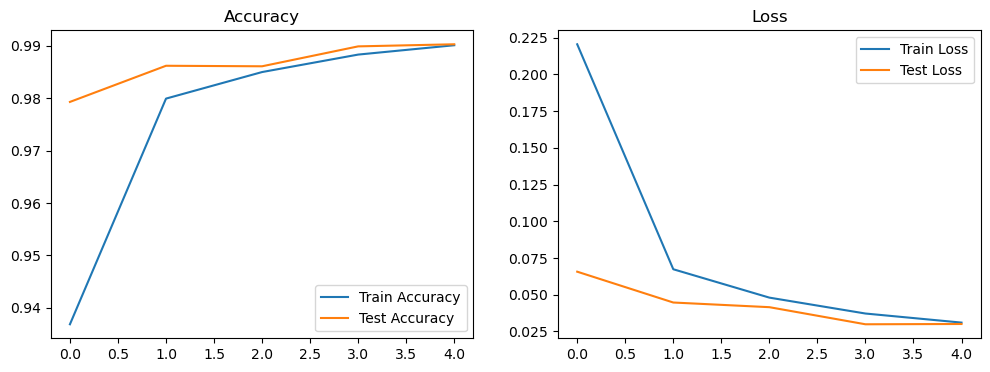

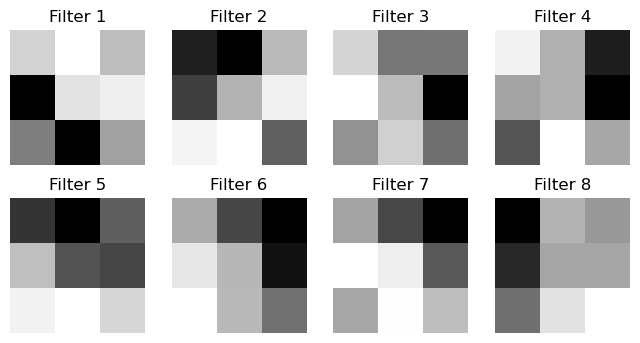

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


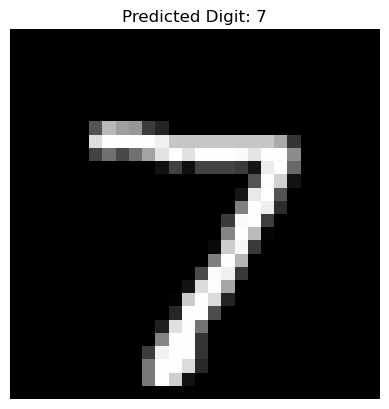

In [1]:
# Cell 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Cell 2: Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255  # Reshape for CNN, normalize to [0,1]
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encode labels (10 classes)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Visualize sample images to understand the data
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Digit: {np.argmax(y_train[i])}')
    plt.axis('off')
plt.show()

# Cell 3: Build the CNN model
model = models.Sequential([
    # Convolution Layer: 16 filters of size 3x3, ReLU activation
    # Input shape: (28, 28, 1) for grayscale images
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # MaxPooling: 2x2 pool size to reduce spatial dimensions (e.g., 26x26 to 13x13)
    layers.MaxPooling2D((2, 2)),
    
    # Convolution Layer: 32 filters
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flattening: Convert 2D feature maps to 1D vector
    layers.Flatten(),
    
    # Fully Connected Layer: 64 neurons
    layers.Dense(64, activation='relu'),
    # Output Layer: 10 classes with softmax for probability distribution
    layers.Dense(10, activation='softmax')
])

# Compile: Use adam optimizer, categorical_crossentropy for multi-class
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()  # Show model architecture

# Cell 4: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Cell 5: Evaluate and visualize training results
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Cell 6: Visualize learned filters from first Conv layer
filters, _ = model.layers[0].get_weights()  # Get 3x3 filters
plt.figure(figsize=(8, 4))
for i in range(8):  # Show 8 filters
    plt.subplot(2, 4, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
    plt.title(f'Filter {i+1}')
plt.show()

# Cell 7: Predict on a test image
sample_image = x_test[0:1]  # Take first test image
prediction = model.predict(sample_image)
predicted_digit = np.argmax(prediction)

plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.axis('off')
plt.show()

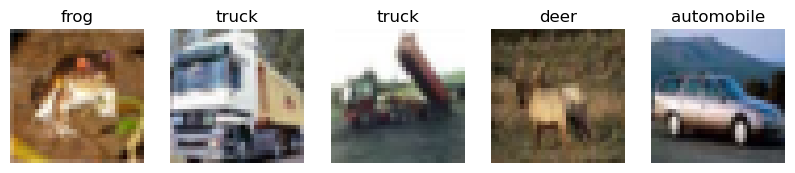

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,466 (513.54 KB)

 Trainable params: 131,466 (513.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 78ms/step - accuracy: 0.3647 - loss: 1.7365 - val_accuracy: 0.5317 - val_loss: 1.2899
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.5869 - loss: 1.1624 - val_accuracy: 0.6439 - val_loss: 1.0351
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.6534 - loss: 0.9795 - val_accuracy: 0.6644 - val_loss: 0.9800
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.6966 - loss: 0.8739 - val_accuracy: 0.6835 - val_loss: 0.9158
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.7269 - loss: 0.7831 - val_accuracy: 0.6928 - val_loss: 0.8828
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.7459 - loss: 0.7291 - val_accuracy: 0.7189 - val_loss: 0.8098
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 82ms/step - accuracy: 0.7706 - loss: 0.6598 - val_accuracy: 0.7104 - val_loss: 0.8316
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.7830 - loss: 0.6162 - 

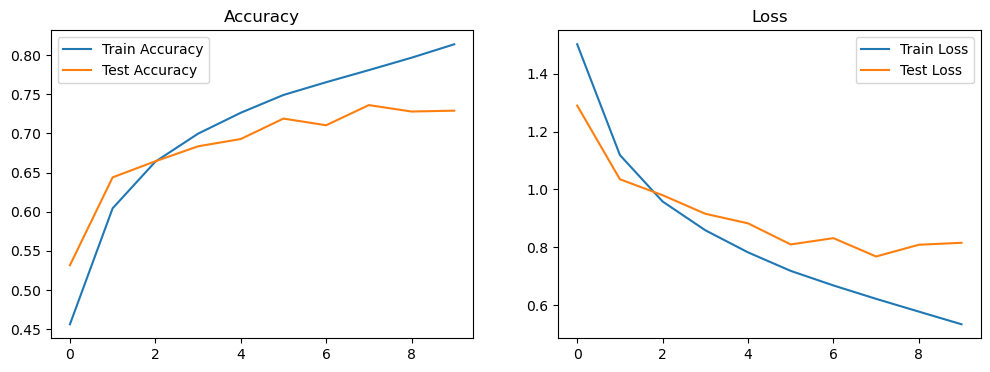

AttributeError: The layer sequential has never been called and thus has no defined input.

In [1]:
# Cell 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Cell 2: Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255  # Normalize RGB images to [0,1]
x_test = x_test.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encode labels
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize sample images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

# Cell 3: Build the CNN model
model = models.Sequential([
    # Convolution Layer 1: 32 filters, 3x3, padding='same' to keep size
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Convolution Layer 2: 64 filters
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Convolution Layer 3: 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flattening
    layers.Flatten(),
    
    # Fully Connected Layers
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Cell 4: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Cell 5: Evaluate and visualize results
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Cell 6: Visualize feature maps for a sample image
sample_image = x_train[0:1]  # First training image
conv1_layer = models.Model(inputs=model.input, outputs=model.layers[0].output)
feature_maps = conv1_layer.predict(sample_image)

plt.figure(figsize=(15, 5))
for i in range(8):  # Show 8 feature maps
    plt.subplot(2, 4, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    plt.axis('off')
    plt.title(f'Feature Map {i+1}')
plt.show()

# Cell 7: Predict on a test image
test_image = x_test[0:1]
prediction = model.predict(test_image)
predicted_class = class_names[np.argmax(prediction)]

plt.imshow(test_image[0])
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()

In [4]:
test_image = x_test[0:1]
prediction = model.predict(test_image)
predicted_class = class_names[np.argmax(prediction)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


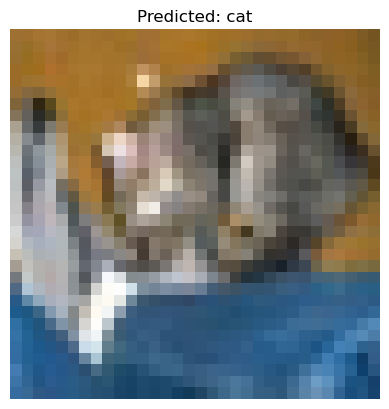

In [5]:
plt.imshow(test_image[0])
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()

In [ ]:
# Cell 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Cell 2: Load and preprocess Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Class names for Fashion MNIST
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize sample images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

# Cell 3: Build the CNN model
model = models.Sequential([
    # Convolution Layer 1: 32 filters, 3x3
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Convolution Layer 2: 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flattening
    layers.Flatten(),
    
    # Fully Connected Layers
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Cell 4: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # Random rotation
    zoom_range=0.1,    # Random zoom
    width_shift_range=0.1,  # Horizontal shift
    height_shift_range=0.1  # Vertical shift
)
datagen.fit(x_train)

# Visualize augmented images
aug_iter = datagen.flow(x_train[:1], batch_size=1)
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    aug_image = next(aug_iter)[0].reshape(28, 28)
    plt.imshow(aug_image, cmap='gray')
    plt.axis('off')
    plt.title('Augmented')
plt.show()

# Cell 5: Train with augmented data
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test))

# Cell 6: Evaluate and visualize results
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Cell 7: Predict on a test image
test_image = x_test[0:1]
prediction = model.predict(test_image)
predicted_class = class_names[np.argmax(prediction)]

plt.imshow(test_image[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()